In [ ]:
!rm -rf *
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-02-11 10:23:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.0MB/s    in 5.7s    

2025-02-11 10:23:34 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak/train/seek

ls: cannot access 'pizza_steak/train/seek': No such file or directory


In [ ]:
from posixpath import dirname
import os
for dirpath,dir_names,file_names in os.walk("pizza_steak"):

  print(f"thr are {len(dir_names)} dir and {len(file_names)} img in '{dirpath}'")


thr are 2 dir and 0 img in 'pizza_steak'
thr are 2 dir and 0 img in 'pizza_steak/test'
thr are 0 dir and 250 img in 'pizza_steak/test/pizza'
thr are 0 dir and 250 img in 'pizza_steak/test/steak'
thr are 2 dir and 0 img in 'pizza_steak/train'
thr are 0 dir and 750 img in 'pizza_steak/train/pizza'
thr are 0 dir and 750 img in 'pizza_steak/train/steak'


In [ ]:
!ls -la pizza_steak

total 20
drwxr-xr-x 4 root root 4096 Feb 11 10:23 .
drwxr-xr-x 1 root root 4096 Feb 11 10:23 ..
drwxr-xr-x 4 root root 4096 Feb 11 10:23 test
drwxr-xr-x 4 root root 4096 Feb 11 10:23 train


In [ ]:
num_steak_img_train=len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_img_train

750

In [ ]:
from typing_extensions import dataclass_transform
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
cls_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
cls_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f'img shape:{img.shape}')
  return img

['3736065.jpg']
img shape:(512, 384, 3)


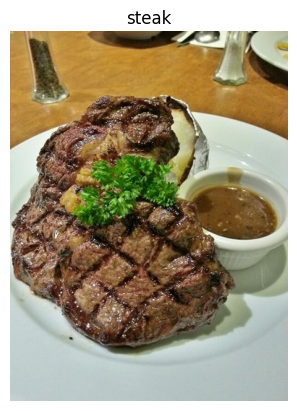

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img) #width,height,color channels

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[177, 154,  87],
        [183, 160,  93],
        [193, 166,  99],
        ...,
        [177, 179, 158],
        [177, 178, 160],
        [176, 177, 159]],

       [[191, 168, 101],
        [198, 175, 108],
        [209, 184, 117],
        ...,
        [180, 182, 161],
        [180, 182, 161],
        [180, 182, 161]],

       [[207, 184, 117],
        [207, 184, 117],
        [207, 182, 115],
        ...,
        [182, 184, 162],
        [182, 184, 162],
        [181, 183, 161]],

       ...,

       [[198, 209, 213],
        [197, 208, 212],
        [197, 208, 212],
        ...,
        [173, 179, 175],
        [172, 178, 174],
        [171, 177, 173]],

       [[198, 209, 213],
        [197, 208, 212],
        [197, 208, 212],
        ...,
        [172, 178, 174],
        [173, 178, 174],
        [174, 179, 175]],

       [[198, 209, 213],
        [197, 208, 212],
        [197, 208, 212],
        ...,
        [170, 176, 17

In [ ]:
img/225

array([[[0.78666667, 0.68444444, 0.38666667],
        [0.81333333, 0.71111111, 0.41333333],
        [0.85777778, 0.73777778, 0.44      ],
        ...,
        [0.78666667, 0.79555556, 0.70222222],
        [0.78666667, 0.79111111, 0.71111111],
        [0.78222222, 0.78666667, 0.70666667]],

       [[0.84888889, 0.74666667, 0.44888889],
        [0.88      , 0.77777778, 0.48      ],
        [0.92888889, 0.81777778, 0.52      ],
        ...,
        [0.8       , 0.80888889, 0.71555556],
        [0.8       , 0.80888889, 0.71555556],
        [0.8       , 0.80888889, 0.71555556]],

       [[0.92      , 0.81777778, 0.52      ],
        [0.92      , 0.81777778, 0.52      ],
        [0.92      , 0.80888889, 0.51111111],
        ...,
        [0.80888889, 0.81777778, 0.72      ],
        [0.80888889, 0.81777778, 0.72      ],
        [0.80444444, 0.81333333, 0.71555556]],

       ...,

       [[0.88      , 0.92888889, 0.94666667],
        [0.87555556, 0.92444444, 0.94222222],
        [0.87555556, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1/225)

In [ ]:
valid_datagen=ImageDataGenerator(rescale=1/225)

In [ ]:
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
mdl1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

mdl1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
mdl1.fit(train_data,
         epochs=5,
         steps_per_epoch=len(train_data),
         validation_data=valid_data,
         validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - accuracy: 0.6379 - loss: 0.6167 - val_accuracy: 0.7740 - val_loss: 0.4676
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.8031 - loss: 0.4608 - val_accuracy: 0.7700 - val_loss: 0.4716
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.8014 - loss: 0.4363 - val_accuracy: 0.8240 - val_loss: 0.3891
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.8538 - loss: 0.3706 - val_accuracy: 0.7960 - val_loss: 0.4296
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9144 - loss: 0.2344 - val_accuracy: 0.8080 - val_loss: 0.4345


In [ ]:
len(train_data),1500/32

(47, 46.875)

In [ ]:
tf.random.set_seed(42)
mdl2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='softmax')
])

mdl2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history=mdl2.fit(train_data,
                           epochs=5,
                           validation_data=valid_data,
                          steps_per_epoch=len(train_data),
                          validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.5117 - loss: 3.4960 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.5164 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.5054 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4823 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
tf.random.set_seed(42)
mdl3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='softmax')
])

mdl3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history=mdl3.fit(train_data,
                           epochs=5,
                           validation_data=valid_data,
                          steps_per_epoch=len(train_data),
                          validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5039 - loss: 9.0268 - val_accuracy: 0.5000 - val_loss: 1.9682
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5214 - loss: 1.4539 - val_accuracy: 0.5000 - val_loss: 0.5029
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4972 - loss: 0.9970 - val_accuracy: 0.5000 - val_loss: 0.4841
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5051 - loss: 0.6085 - val_accuracy: 0.5000 - val_loss: 0.5667
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4985 - loss: 0.5270 - val_accuracy: 0.5000 - val_loss: 0.4959


['1400760.jpg']
img shape:(512, 512, 3)
['1088332.jpg']
img shape:(366, 512, 3)


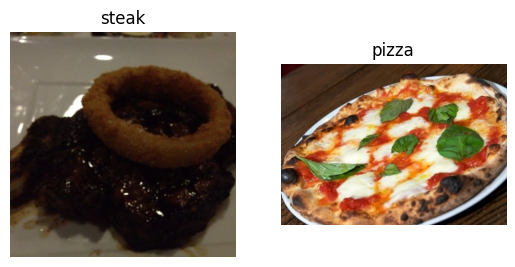

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak=view_random_image(target_dir='pizza_steak/train/',target_class='steak')
plt.subplot(1,2,2)
pizza=view_random_image(target_dir='pizza_steak/train/',target_class='pizza')

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

rather than looking at all data we look at only 32 at ones creating
it as a batch

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1/225) #tensor img data
test_datagen=ImageDataGenerator(rescale=1/225)

**ImageDataGenerator**

Automatic Preprocessing	- Rescales, normalizes images automatically.

Augmentation -	Helps increase dataset size artificially.

Efficient Loading	- Reads images batch-by-batch to reduce memory usage.

Works with Directories -	No need to manually load images into arrays.

In [ ]:
train_data=train_datagen.flow_from_directory(train_dir, #target directory
                                             batch_size=32, # size of mini batches
                                             target_size=(224,224), #(height,weight)
                                             class_mode='binary', #type of data
                                             seed=42)
test_data=test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


flow_from_directory()

 automatically creates batches of images while loading them from the directory. It does not load all images into memory at once, making it efficient for handling large datasets.

In [ ]:
img,label=train_data.__next__() #get the next batch of img/label

In [ ]:
len(img),len(label)

(32, 32)

In [ ]:
img[:2],img[0].shape

(array([[[[0.48000002, 0.4888889 , 0.39111114],
          [0.35555556, 0.37333333, 0.27111113],
          [0.30222222, 0.32      , 0.20888889],
          ...,
          [0.48000002, 0.39111114, 0.43111113],
          [0.48444447, 0.39555556, 0.4488889 ],
          [0.51111114, 0.41777778, 0.48444447]],
 
         [[0.3288889 , 0.34666666, 0.24444444],
          [0.52000004, 0.5377778 , 0.42666668],
          [0.29777777, 0.32444444, 0.20888889],
          ...,
          [0.4488889 , 0.3866667 , 0.3866667 ],
          [0.47111112, 0.41777778, 0.43555558],
          [0.4488889 , 0.39555556, 0.41333336]],
 
         [[0.41333336, 0.45333335, 0.33333334],
          [0.44      , 0.48000002, 0.36      ],
          [0.34666666, 0.3866667 , 0.26666668],
          ...,
          [0.39111114, 0.36888888, 0.3511111 ],
          [0.3511111 , 0.3377778 , 0.31555557],
          [0.38222224, 0.36888888, 0.34666666]],
 
         ...,
 
         [[0.5822222 , 0.5688889 , 0.61777776],
          [0.59111

In [ ]:
label

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

baseline model is relatively simple model that u setup when begining ML experimenting.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential
mdl4=Sequential([
    Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3, #or filter size used to det shape of filter(sliding wnd) over op [low val learn small feature]
           strides=1, #no of steps filter takes across img at a time( if 1 ,filter, moves across img 1 px at a time)
           padding='valid', #pads target tensor with 0s('same') to preserve ip shape or leaves tesnor as it is('valid') lowering op shape
           activation='relu',
           input_shape=(224,224,3)), #ip layer
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') #op layer for binary classification so only 1 op neuron
])
mdl4.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

**Max Pooling Layer**
a layer in a convolutional neural network (CNN) that reduces the size of feature maps while keeping the most important information

In [ ]:
mdl4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
hist4=mdl4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.6113 - loss: 11.7594 - val_accuracy: 0.7580 - val_loss: 0.5190
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.7606 - loss: 0.5410 - val_accuracy: 0.7880 - val_loss: 0.4445
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8151 - loss: 0.4281 - val_accuracy: 0.8260 - val_loss: 0.4084
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.8679 - loss: 0.3564 - val_accuracy: 0.8220 - val_loss: 0.3933
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9381 - loss: 0.2169 - val_accuracy: 0.8020 - val_loss: 0.4652


In [ ]:
mdl1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7967 - loss: 0.4342


[0.43451783061027527, 0.8080000281333923]

<Axes: >

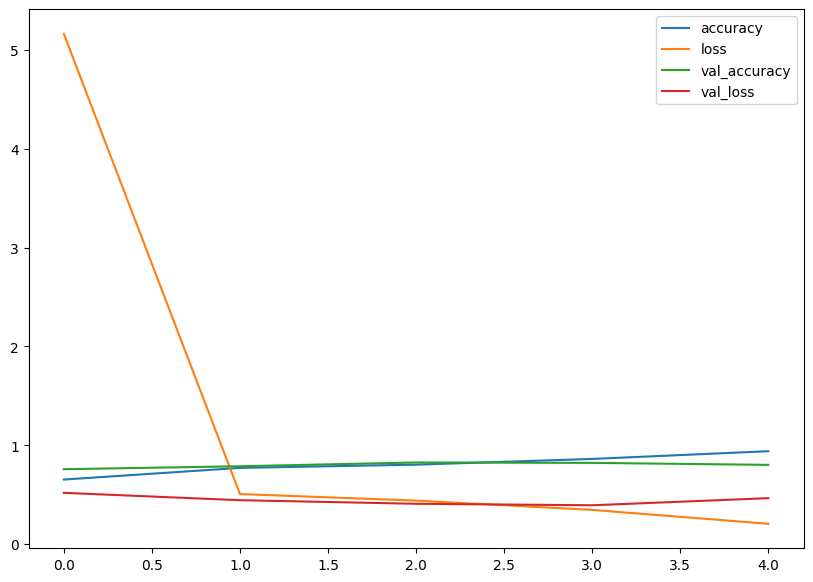

In [ ]:
import pandas as pd
pd.DataFrame(hist4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

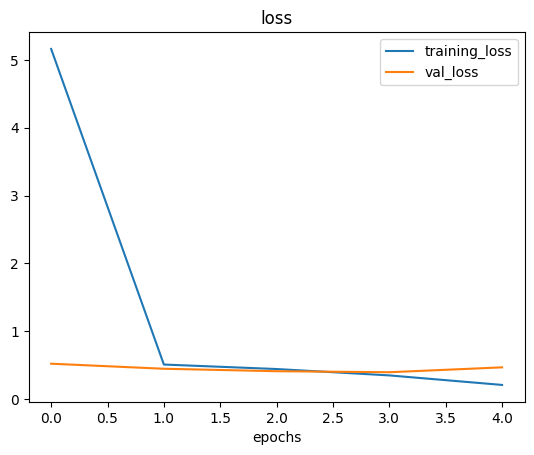

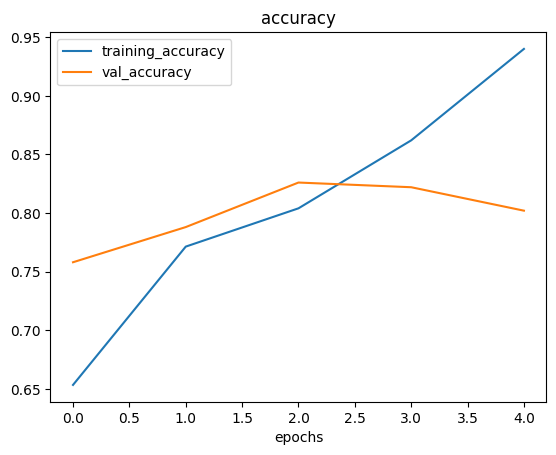

In [ ]:
plot_loss_curves(hist4)

when the validation loss starts increasing the mdl is mostly overfitting training ds.

the model is not able to generalize well.

**increase overfitting:**

inc no of conv layer

inc no of conv filters

 add one more dense layer to op of flatter layer

 **reduce overfitting:**

add data augmentation

add reg layers(maxpool2d)

add more data

In [ ]:
mdl5=Sequential([
    Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)), #ip layer
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid') #op layer for binary classification so only 1 op neuron
])
mdl5.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
hist5=mdl5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5738 - loss: 0.6997 - val_accuracy: 0.7500 - val_loss: 0.5096
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.7587 - loss: 0.5069 - val_accuracy: 0.8240 - val_loss: 0.4032
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7961 - loss: 0.4298 - val_accuracy: 0.8200 - val_loss: 0.3964
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.8223 - loss: 0.4170 - val_accuracy: 0.8520 - val_loss: 0.3547
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.8524 - loss: 0.3724 - val_accuracy: 0.8100 - val_loss: 0.4253


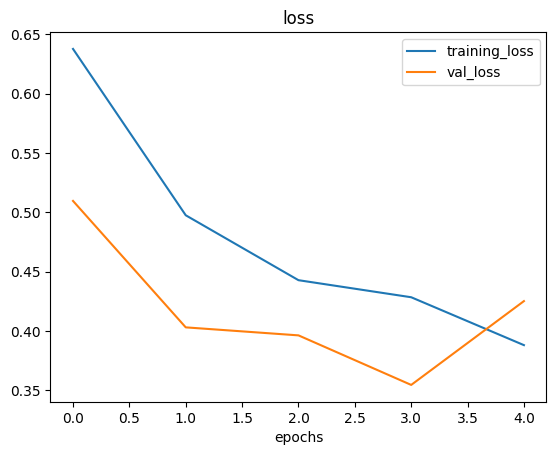

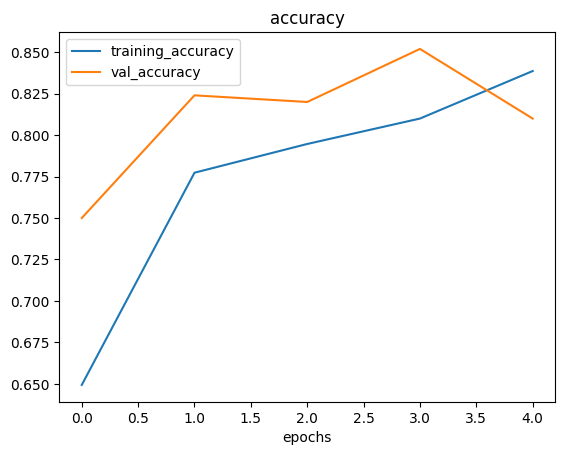

In [ ]:
plot_loss_curves(hist5)

In [ ]:
train_datagen_aug=ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.3,
                                     horizontal_flip=True
                                     )
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("aug train data")
train_data_aug=train_datagen_aug.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     shuffle=False,
                                                     class_mode='binary')

aug train data
Found 1500 images belonging to 2 classes.


In [ ]:
print("non-aug train data")
train_data=train_datagen.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     shuffle=False,
                                                     class_mode='binary')

non-aug train data
Found 1500 images belonging to 2 classes.


In [ ]:
print("non-aug test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode='binary')

non-aug test data
Found 500 images belonging to 2 classes.


data augn is done only on training data

In [ ]:
img,label=train_data.__next__()
augimg,auglabel=train_data_aug.__next__()

Text(0.5, 1.0, '0.0')

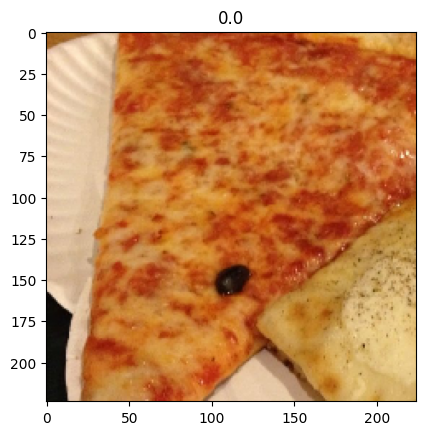

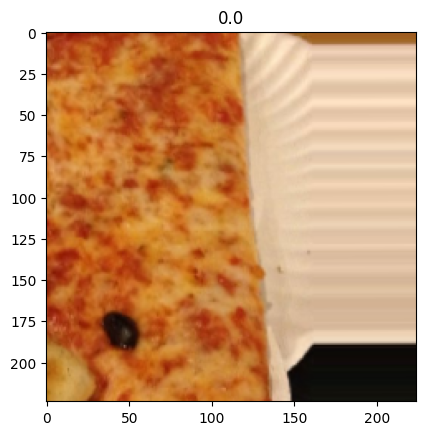

In [ ]:
import random
rno=random.randint(0,32)
plt.imshow(img[rno])
plt.title(label[rno])
plt.figure()
plt.imshow(augimg[rno])
plt.title(auglabel[rno])

In [ ]:
mdl6=Sequential([
    Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)), #ip layer
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid') #op layer for binary classification so only 1 op neuron
])
mdl6.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
hist6=mdl6.fit(train_data_aug, #aug data as it is loaded in so this takes much longer time
               epochs=5,steps_per_epoch=len(train_data_aug),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 492ms/step - accuracy: 0.4385 - loss: 0.7068 - val_accuracy: 0.5040 - val_loss: 0.6902
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 549ms/step - accuracy: 0.4848 - loss: 0.6932 - val_accuracy: 0.6520 - val_loss: 0.6869
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 491ms/step - accuracy: 0.5851 - loss: 0.6889 - val_accuracy: 0.7420 - val_loss: 0.6513
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 438ms/step - accuracy: 0.6479 - loss: 0.6559 - val_accuracy: 0.7100 - val_loss: 0.5353
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 413ms/step - accuracy: 0.5883 - loss: 0.6726 - val_accuracy: 0.7940 - val_loss: 0.5522


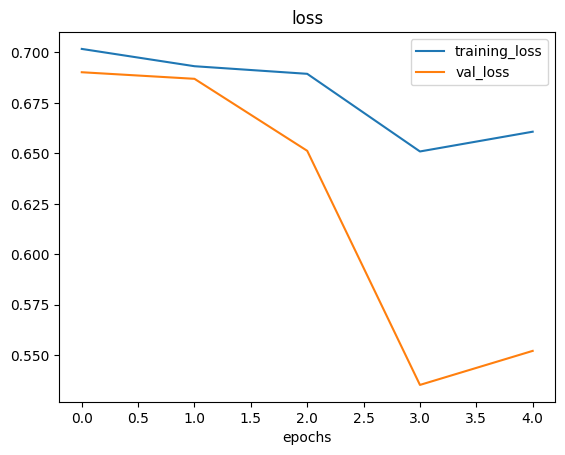

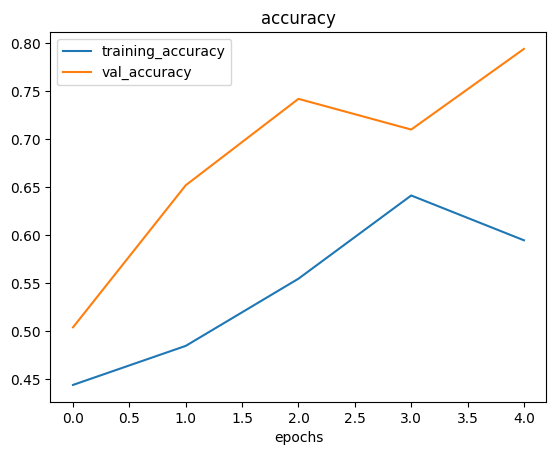

In [ ]:
plot_loss_curves(hist6)

the model didnot perform that grt on data that is only aug so lets now do both aug and shuffling

In [ ]:
print("aug train data")
train_data_aug_shuffled=train_datagen_aug.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     shuffle=True,
                                                     class_mode='binary')

aug train data
Found 1500 images belonging to 2 classes.


In [ ]:
mdl7=Sequential([
    Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)), #ip layer
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid') #op layer for binary classification so only 1 op neuron
])
mdl7.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
hist7=mdl7.fit(train_data_aug_shuffled,
               epochs=5,steps_per_epoch=len(train_data_aug_shuffled),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 435ms/step - accuracy: 0.5664 - loss: 0.6749 - val_accuracy: 0.7400 - val_loss: 0.5300
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.6908 - loss: 0.5889 - val_accuracy: 0.8000 - val_loss: 0.4642
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 557ms/step - accuracy: 0.7100 - loss: 0.5532 - val_accuracy: 0.8000 - val_loss: 0.4076
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 414ms/step - accuracy: 0.7399 - loss: 0.5394 - val_accuracy: 0.8480 - val_loss: 0.3509
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 429ms/step - accuracy: 0.7630 - loss: 0.4740 - val_accuracy: 0.8540 - val_loss: 0.3373


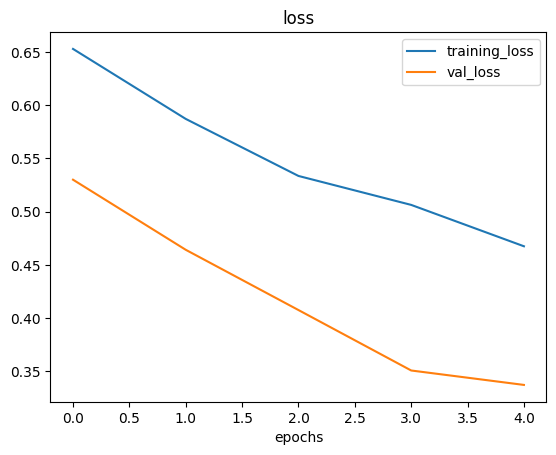

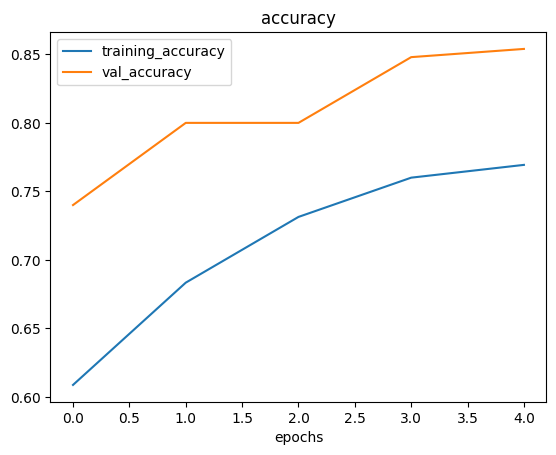

In [ ]:
plot_loss_curves(hist7)

**improve model**

inc no of model layers

inc no of filters in each conv layers

train longer

ideal lr

more data

use transfer learning





In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak= mpimg.imread('/content/03-steak.jpeg')

--2025-02-11 10:33:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  6.49MB/s    in 0.3s    

2025-02-11 10:33:58 (6.49 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



UnidentifiedImageError: cannot identify image file '/content/03-steak.jpeg'

In [ ]:
steak= mpimg.imread('/content/03-steak.jpeg')

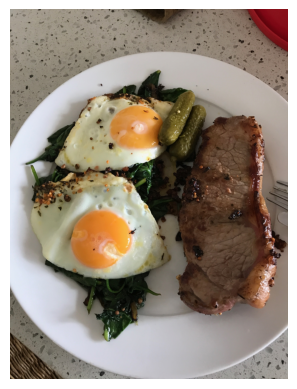

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak,steak.shape

(array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 126, 102],
         [148, 128, 103],
         [114,  93,  72],
         ...,
         [153, 142, 136],
  

In [ ]:
expstk=tf.expand_dims(steak,axis=0)
expstk.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
def load_prep_img(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_jpeg(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [ ]:
steak=load_prep_img('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=mdl7.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
preed_class=cls_names[int(tf.round(pred))]

In [ ]:
preed_class

'steak'

In [ ]:
def pred_plot(model,filename,class_names):
  img=load_prep_img(filename)

  pred=model.predict(tf.expand_dims(img,axis=0))
  preed_class=cls_names[int(tf.round(pred))]
  print(pred)
  plt.imshow(img)
  plt.title(f'pred={preed_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[0.9144365]]


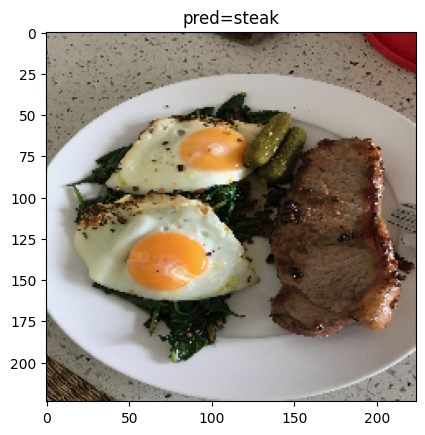

In [ ]:
pred_plot(mdl7,'03-steak.jpeg',cls_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.02797468]]


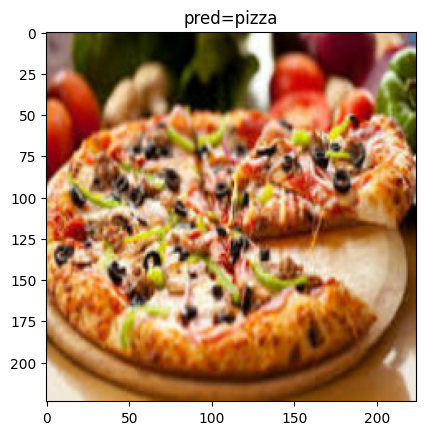

In [ ]:
pred_plot(mdl7,'/content/download.jpg',cls_names)

***multiclass classification ***


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile('/content/10_food_classes_all_data.zip')

--2025-02-12 04:33:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.207, 108.177.97.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  27.2MB/s    in 19s     

2025-02-12 04:33:24 (25.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref.extractall()
zip_ref.close()

In [3]:
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [4]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import random
img=view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

NameError: name 'view_random_image' is not defined

In [6]:
random.choice(class_names)

'grilled_salmon'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [8]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential
mdl1=Sequential([Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)), #ip layer

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') #op layer for binary classification so only 1 op neuron
])
mdl1.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
hist1=mdl1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
  7/235 ━━━━━━━━━━━━━━━━━━━━ 8:08 2s/step - accuracy: 0.0861 - loss: 2.3424

KeyboardInterrupt: 

In [ ]:
len(train_data)

235

In [ ]:
mdl1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.3133 - loss: 2.4694


[2.519808053970337, 0.32120001316070557]

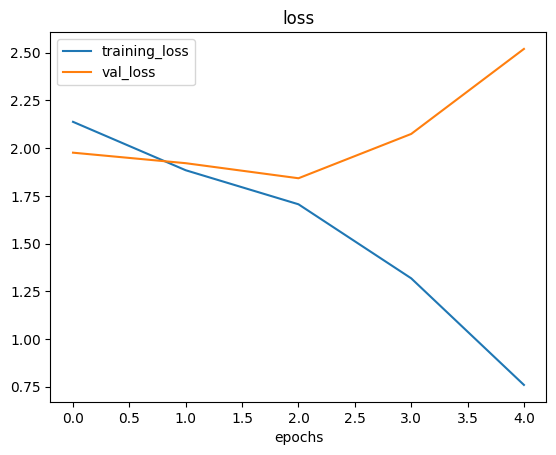

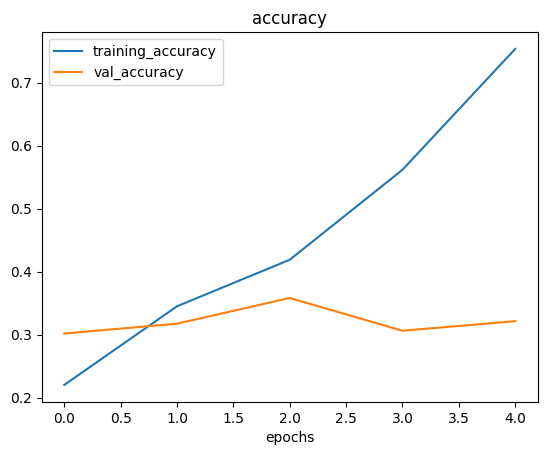

In [ ]:
plot_loss_curves(hist1)

The model is overfitting

get more data

simplify model

use data augmentation

use transfer learning

In [14]:
mdl2=Sequential([Conv2D(filters=10, #how many filters shld pass over ip tensor(ex:sliding window)[higher val higher complexity]
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)), #ip layer

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') #op layer for binary classification so only 1 op neuron
])
mdl2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
hist2=mdl2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.1768 - loss: 2.2215 - val_accuracy: 0.2916 - val_loss: 2.0011
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.4687 - loss: 1.6024 - val_accuracy: 0.2864 - val_loss: 2.1549
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.8556 - loss: 0.5396 - val_accuracy: 0.3008 - val_loss: 2.6149
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 151ms/step - accuracy: 0.9821 - loss: 0.1055 - val_accuracy: 0.2824 - val_loss: 3.5217
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.9958 - loss: 0.0294 - val_accuracy: 0.2908 - val_loss: 4.1818


In [11]:
train_datagen_aug=ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.3,
                                     horizontal_flip=True
                                     )
train_datag_aug=train_datagen_aug.flow_from_directory(train_dir,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [15]:
import tensorflow as tf
mdl3=tf.keras.models.clone_model(mdl2)
mdl3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [16]:
mdl3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 121000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │       1,210,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,211,200 (4.62 MB)

 Trainable params: 1,211,200 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hist3=mdl3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
 67/235 ━━━━━━━━━━━━━━━━━━━━ 4:06 1s/step - accuracy: 0.1547 - loss: 2.5444

KeyboardInterrupt: 

In [ ]:
mdl1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3295 - loss: 2.5033


[2.519808769226074, 0.32120001316070557]

In [ ]:
mdl3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.3106 - loss: 3.3599


[3.4083616733551025, 0.2924000024795532]

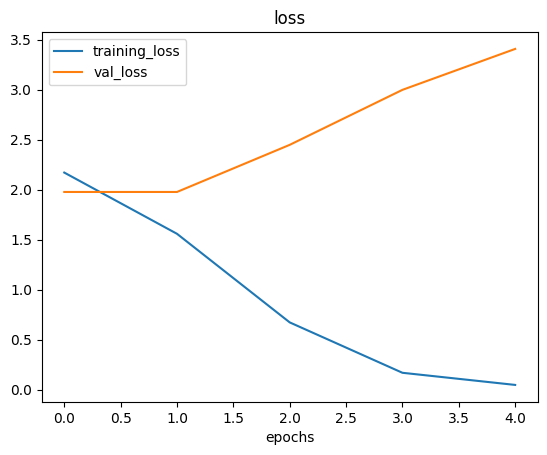

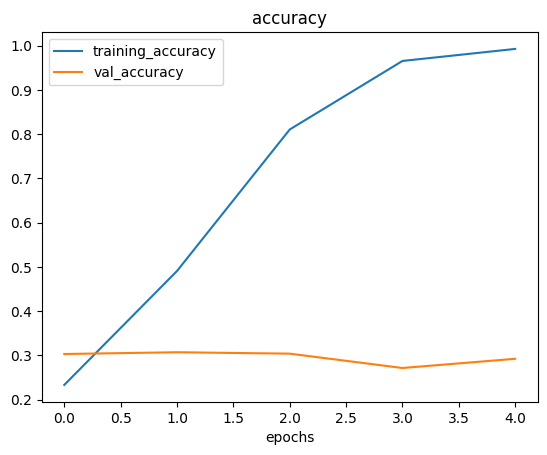

In [ ]:
plot_loss_curves(hist3)

In [ ]:
def pred_plot(model,filename,class_names):
  img=load_prep_img(filename)

  pred=model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0])>1:
    preed_class=cls_names[tf.argmax(pred[0])]
  else:
    preed_class=cls_names[int(tf.round(pred[0]))]
  print(pred)
  plt.imshow(img)
  plt.title(f'pred={preed_class}')

In [ ]:
pred_plot(mdl3,'download.jpeg',class_names)

In [ ]:
mdl3.save("saved_tained_model")

In [ ]:
loaded_mdl3=tf.keras.models.load_model("saved_trained_model")
loaded_mdl3.evaluate(test_data)

In [ ]:
mdl3.evaluate(test_data)